상관계수 : [[1.         0.98084935]
 [0.98084935 1.        ]]


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,153 (4.50 KB)

 Trainable params: 1,153 (4.50 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.3746 - mse: 4.3746    
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1671 - mse: 0.1671 
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1897 - mse: 0.1897         
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4340 - mse: 0.4340 
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1215 - mse: 0.1215 
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3084 - mse: 0.3084 
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3097 - mse: 0.3097 
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7146 - mse: 0.7146 
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2875 - mse: 0.2875 
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3683 - mse: 0.3683         
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.0798 - mse: 0.0798
[0.07980693131685257, 0.07980693131685257]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
예측값 : [1.1719556 2.120069  3.0681827 4.016296  

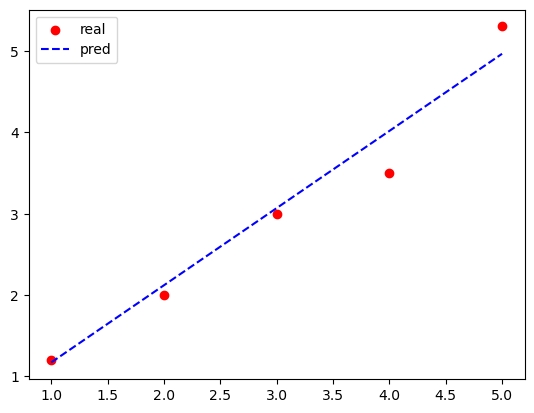

In [ ]:
# 필요한 라이브러리들을 불러옵니다.
# tensorflow: 딥러닝을 위한 핵심 라이브 러리
# numpy: 수치 연산을 위한 라이브러리
# Sequential: 층(layer)을 순서대로 쌓아 모델을 만드는 Keras의 모델 API
# Dense: 완전 연결(fully-connected) 층, 각 뉴런이 이전 층의 모든 뉴런과 연결.
# Activation: 활성화 함수를 정의하는 층 (여기서는 Dense 층에 통합)
# Input: 모델의 입력 형태를 정의하는 층
# optimizers: 모델 학습 시 가중치를 업데이트하는 최적화 도구들을 모아놓은 모듈
# 사이킷런(Scikit-learn) 라이브러리에서 결정계수(R-squared)를 계산하는 함수를 불러옴.

import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras import optimizers 
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# x_data: 독립 변수, 입력 값
# y_data: 종속 변수, 실제 값
# .reshape(-1, 1)은 1차원 배열을 열이 1개인 2차원 배열로
x_data = np.array([1.,2.,3.,4.,5.]).reshape(-1,1)
y_data = np.array([1.2,2.0,3.0,3.5,5.3]).reshape(-1,1)

# x_data와 y_data의 상관계수(correlation coefficient)를 계산하고 출력
# 상관계수는 두 변수 간의 선형 관계 강도나타냄
print('상관계수 :' , np.corrcoef(x_data.ravel(), y_data.ravel()))

model = Sequential()
model.add(Input(shape=(1,))) # 모델의 입력 형태를 정의합니다. shape=(1,)는 입력 값이 1차원임을 의미
# Dense 층을 추가합니다.
# units=1: 출력 뉴런의 개수를 1개로 설정합니다. (단순 선형 회귀이므로)
# activation='linear': 활성화 함수를 선형 함수로 설정합니다. (y = wx + b 형태)
model.add(Dense(units=32, activation = 'relu'))
model.add(Dense(units=32, activation = 'relu'))  # 추가 은닉층 추가
model.add(Dense(units=1, activation = 'linear'))
print(model.summary())

# 모델을 컴파일(compile).
# 모델을 훈련하기 전에 모델의 학습 방식을 설정하는 단계.
# optimizer='sgd': 경사하강법(Stochastic Gradient Descent)을 최적화 도구로 사용. 
# loss='mse': 손실 함수(Loss function)로 평균 제곱 오차(Mean Squared Error)를 사용. 
#             실제값과 예측값의 차이를 제곱하여 평균을 낸 값으로, 이 값을 최소화하는 방향으로 학습이 진행.
# metrics=['mse']: 모델의 성능을 평가할 지표로 평균 제곱 오차를 사용.

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.fit(x_data, y_data, batch_size=1, epochs=10, verbose=1, shuffle=True)
print(model.evaluate(x_data, y_data))

pred = model.predict(x_data)
print('예측값 :' , pred.ravel())
print('실제값 :' , y_data.ravel())

# 결정계수
print('설명력 : ', r2_score(y_data, pred))

plt.scatter(x_data, y_data, color='r', marker='o', label='real')
plt.plot(x_data, pred, 'b--', label='pred')
plt.legend()
plt.show()


